<a href="https://colab.research.google.com/github/geriiy/ML_Ganjil_2025/blob/main/JS4_2341720109_Gheriya_Rahima_Jauhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/sample_data/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# PRAKTIKUM 1

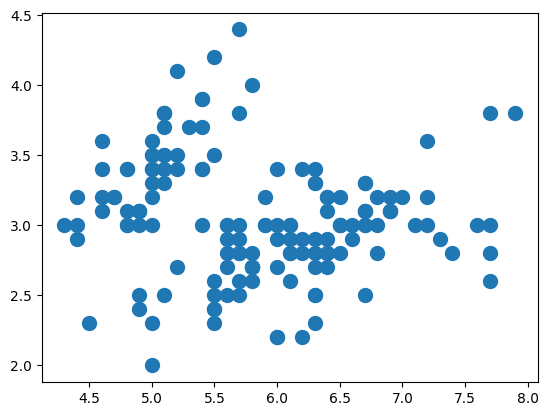

In [6]:
# Seleksi Fitur
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# Plot Data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

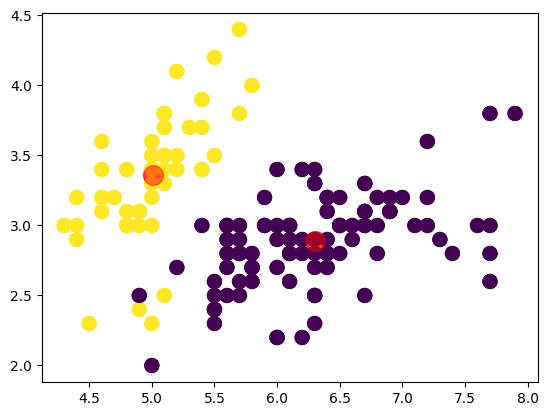

In [8]:
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [9]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


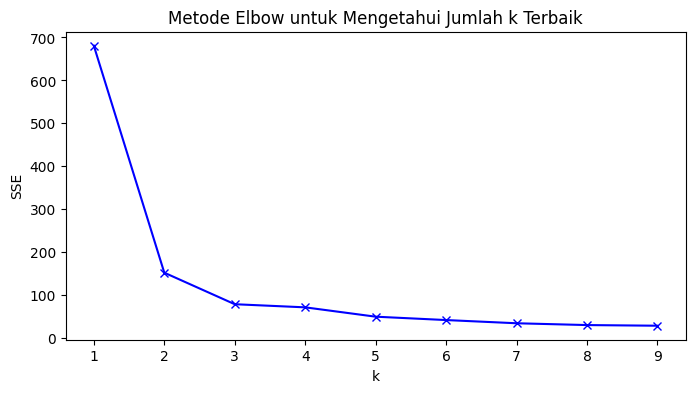

In [11]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()


In [12]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=71.66131466733202
k=5; SSE=49.91714055829228
k=6; SSE=42.0686256330626
k=7; SSE=34.59958924014792
k=8; SSE=30.39691638521437
k=9; SSE=28.874643790849657


# PRAKTIKUM 2

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

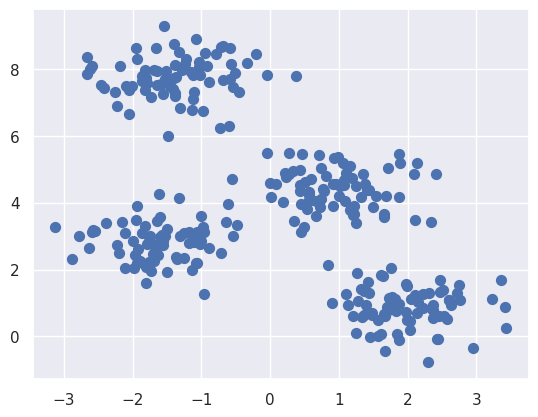

In [14]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

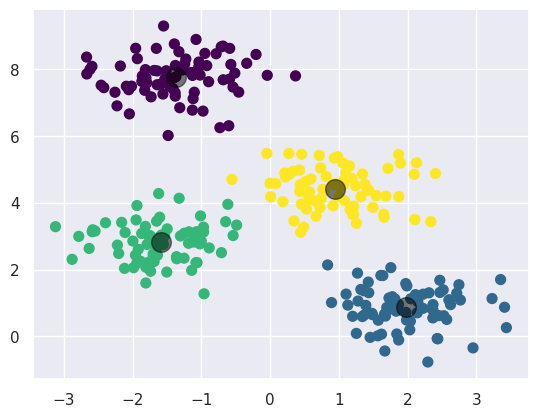

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

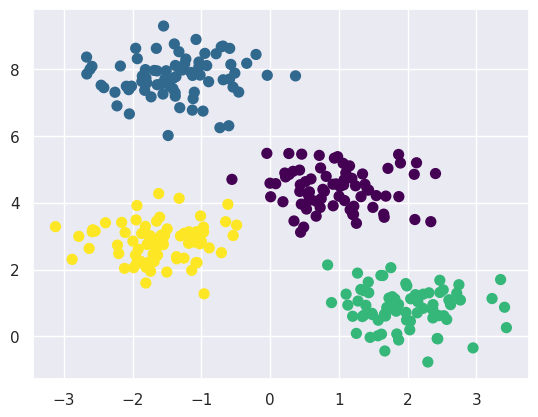

In [16]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

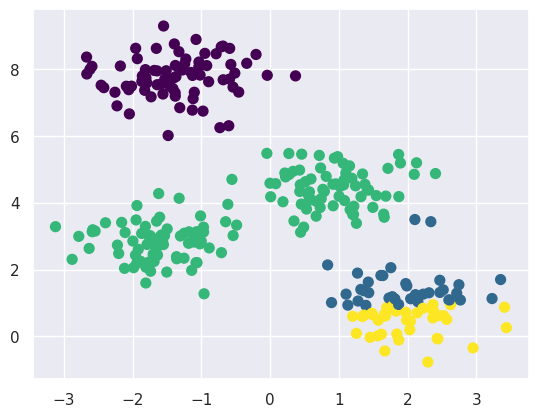

In [17]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

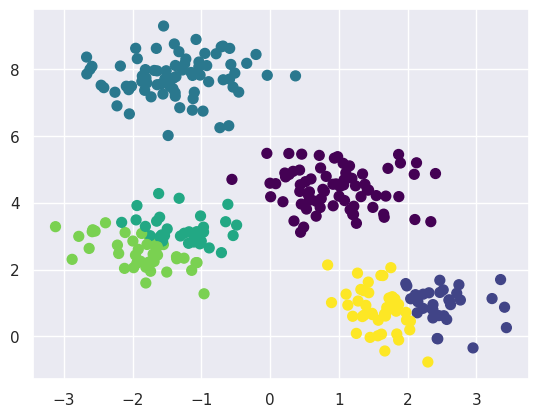

In [18]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

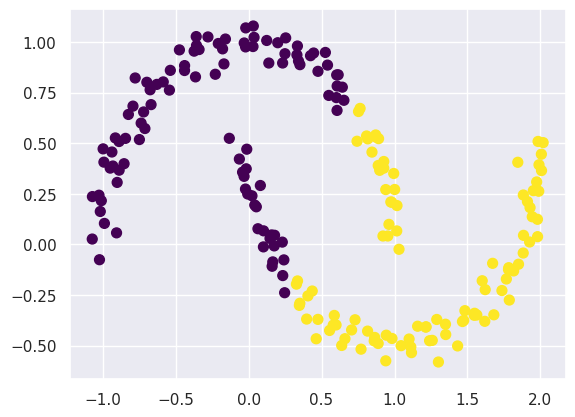

In [19]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


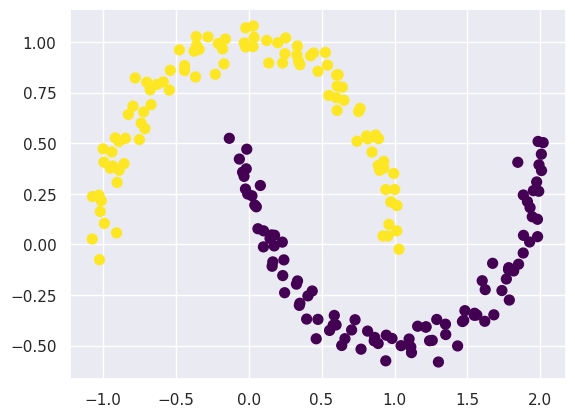

In [20]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

1) Studi Kasus 1: Karakter Angka

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [22]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

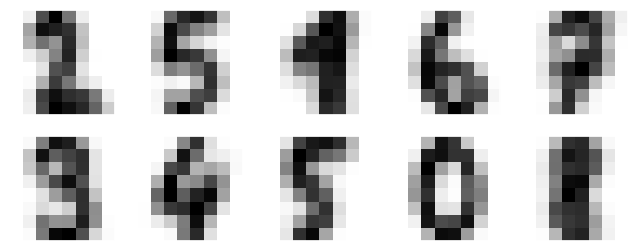

In [23]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [24]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

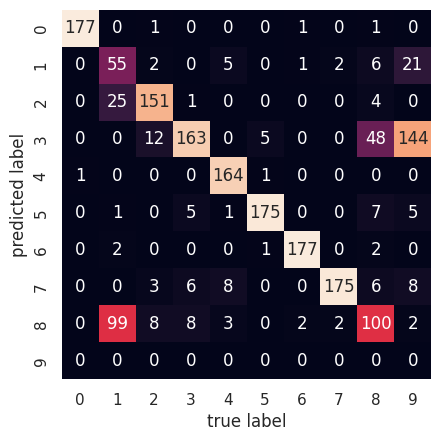

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

2) Studi Kasus 2: Kompresi Citra

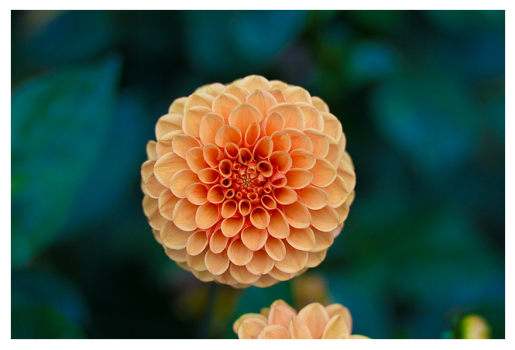

In [27]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [28]:
flower.shape

(427, 640, 3)

In [29]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [36]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

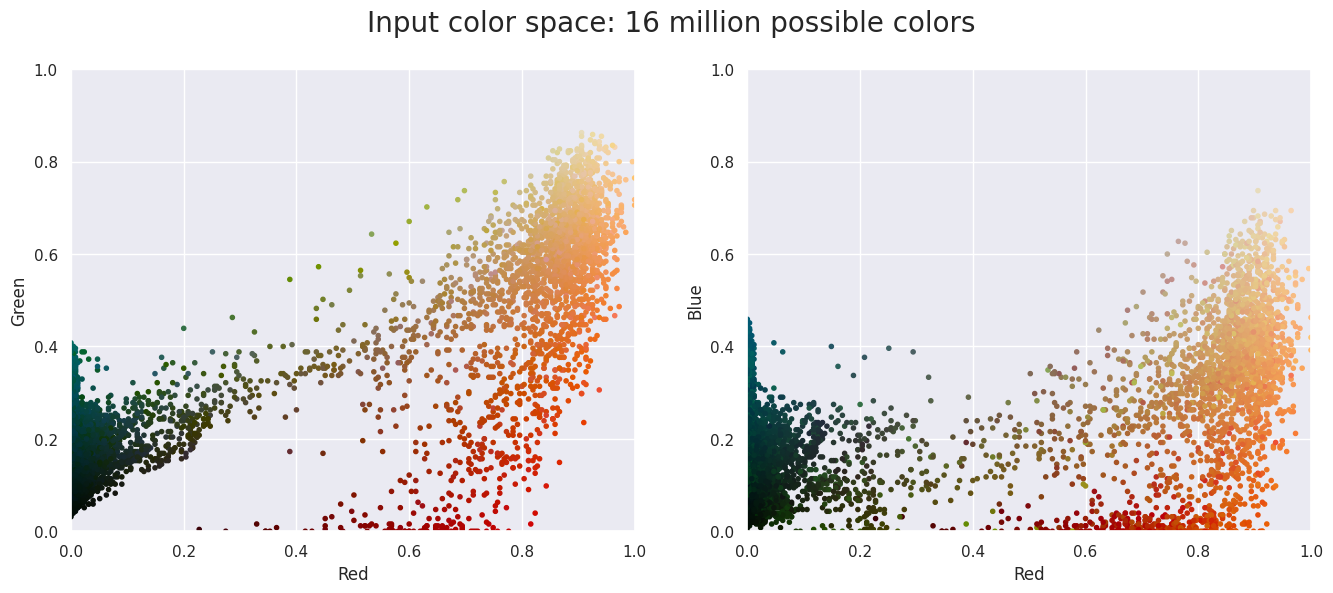

In [37]:
plot_pixels(data, title='Input color space: 16 million possible colors')

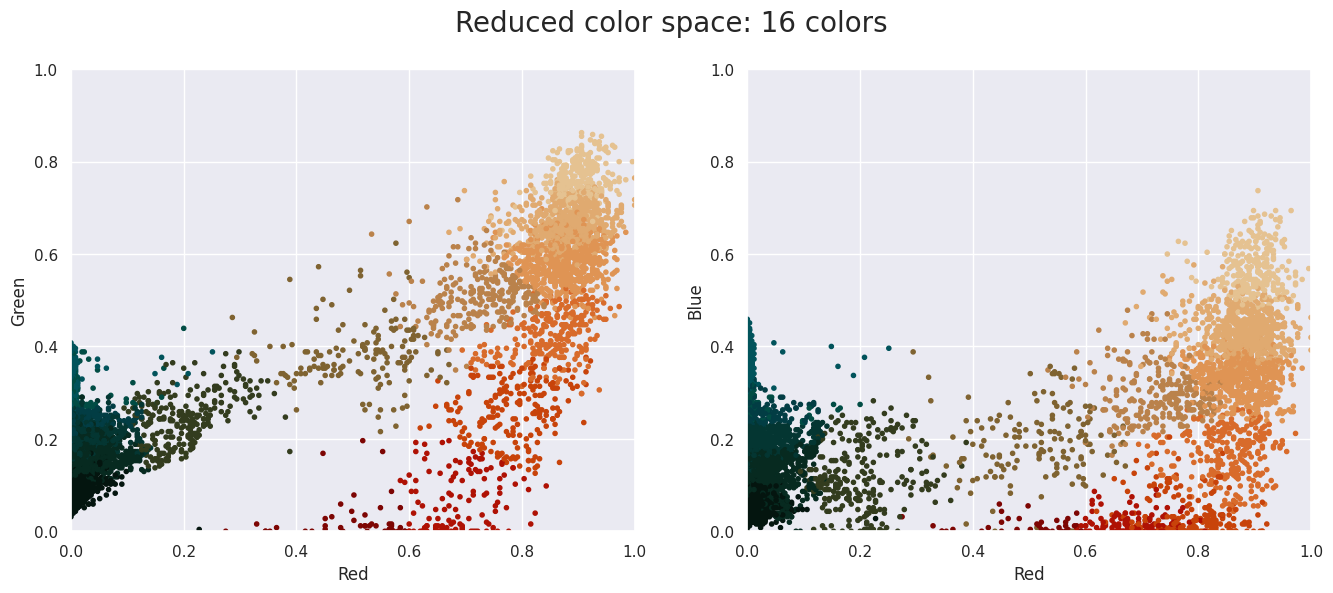

In [38]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

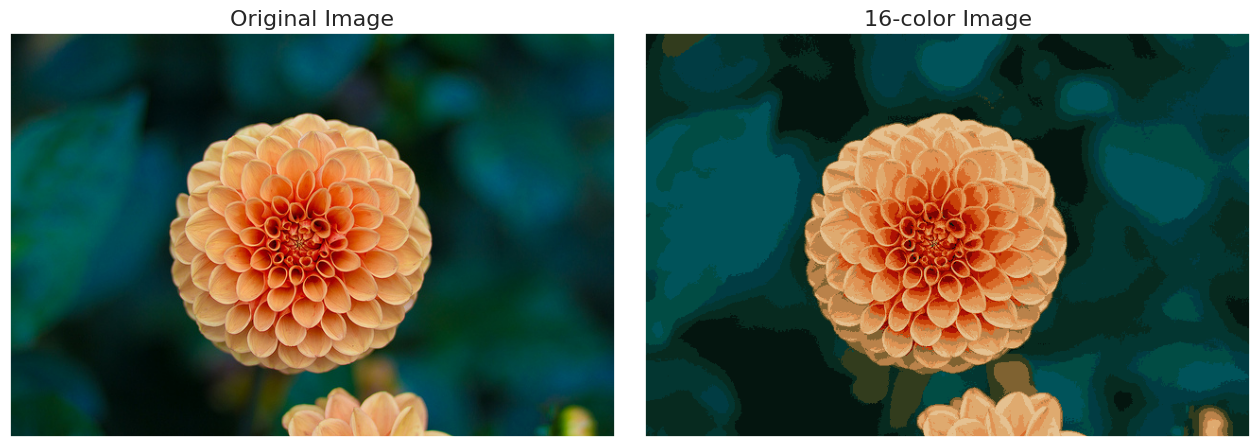

In [39]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# PRAKTIKUM 3

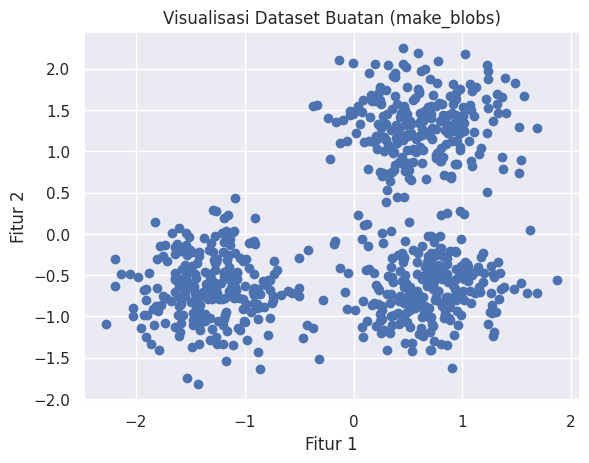

In [50]:
# Import library yang diperlukan
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Membuat dataset buatan dengan 3 cluster
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750,
    centers=centers,
    cluster_std=0.4,
    random_state=0
)

# Normalisasi data
X = StandardScaler().fit_transform(X)

# Visualisasi data
plt.scatter(X[:, 0], X[:, 1])
plt.title("Visualisasi Dataset Buatan (make_blobs)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()


In [53]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

# Jalankan DBSCAN dengan parameter epsilon dan minimal sampel
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Hitung jumlah cluster dan noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 18


In [55]:
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")


Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


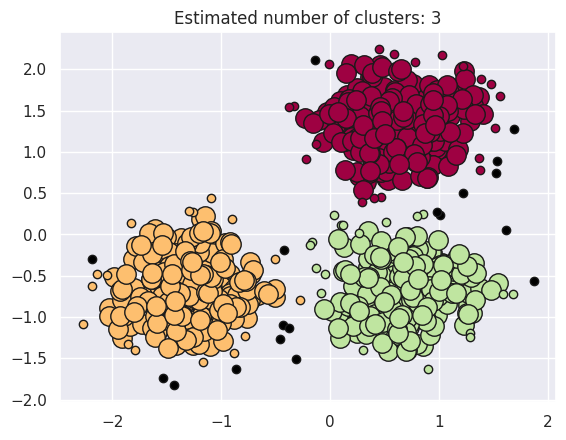

In [58]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Warna hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Titik inti
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Titik bukan inti
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


# TUGAS PRAKTIKUM

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [61]:
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")
print("Data Sample:")
display(df.head())


Data Sample:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


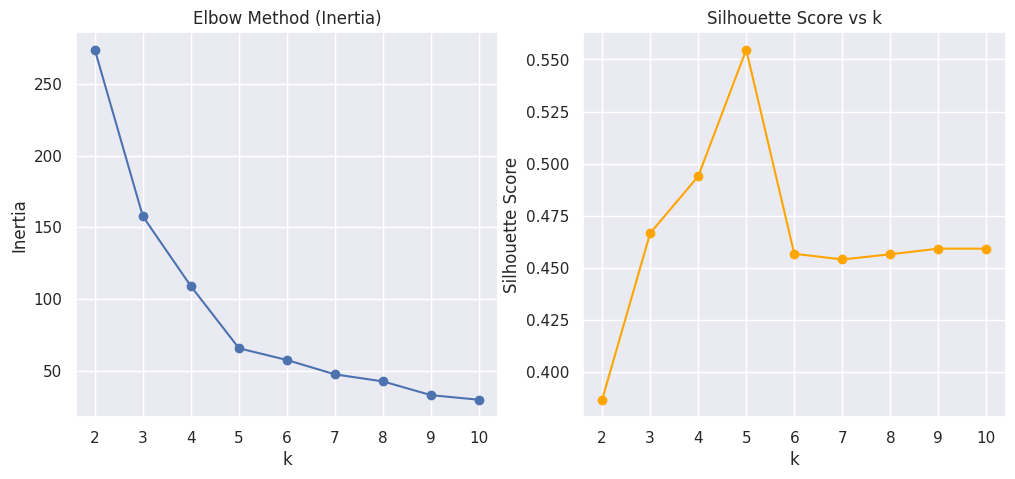

In [64]:
# Pilih 2 fitur utama
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mencari k terbaik (Elbow + Silhouette)
inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K_range, silhouettes, marker='o', color='orange')
plt.title('Silhouette Score vs k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

Best k based on silhouette: 5


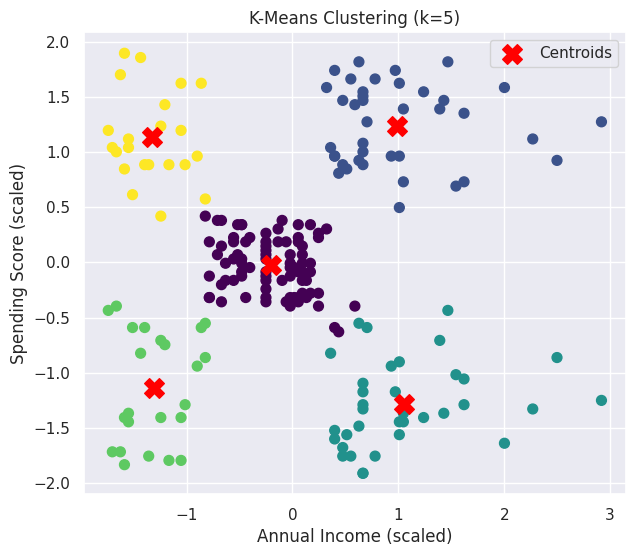

In [65]:
# Ambil k terbaik (misalnya berdasarkan nilai Silhouette tertinggi)
best_k = K_range[np.argmax(silhouettes)]
print(f"Best k based on silhouette: {best_k}")

# Fit model akhir
kmeans_final = KMeans(n_clusters=best_k, random_state=0, n_init='auto')
labels_kmeans = kmeans_final.fit_predict(X_scaled)

# Visualisasi hasil cluster
plt.figure(figsize=(7,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans_final.cluster_centers_[:,0], kmeans_final.cluster_centers_[:,1],
            c='red', s=200, marker='X', label='Centroids')
plt.title(f'K-Means Clustering (k={best_k})')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

In [66]:
# DBSCAN — make_moons + eksperimen parameter

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Buat dataset make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=0)

# Normalisasi
X_moons_scaled = StandardScaler().fit_transform(X_moons)

# Jalankan DBSCAN default (eps=0.2, min_samples=5)
db = DBSCAN(eps=0.2, min_samples=5).fit(X_moons_scaled)
labels = db.labels_

# Hitung jumlah cluster & noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Evaluasi metrik
print("Homogeneity:", metrics.homogeneity_score(y_moons, labels))
print("Completeness:", metrics.completeness_score(y_moons, labels))
print("V-measure:", metrics.v_measure_score(y_moons, labels))
print("Adjusted Rand Index:", metrics.adjusted_rand_score(y_moons, labels))
print("Adjusted Mutual Information:", metrics.adjusted_mutual_info_score(y_moons, labels))
print("Silhouette Coefficient:", metrics.silhouette_score(X_moons_scaled, labels))

Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
Adjusted Rand Index: 1.0
Adjusted Mutual Information: 1.0
Silhouette Coefficient: 0.3915969903000845


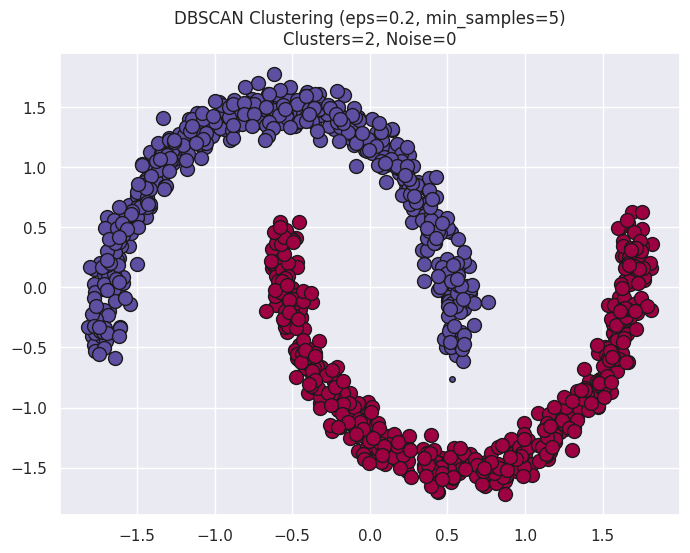

In [67]:
# Visualisasi hasil DBSCAN
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # noise = hitam
    class_member_mask = (labels == k)

    xy = X_moons_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X_moons_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title(f'DBSCAN Clustering (eps=0.2, min_samples=5)\nClusters={n_clusters_}, Noise={n_noise_}')
plt.show()

In [69]:
# Eksperimen DBSCAN (eps & min_samples)

eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

records = []
for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X_moons_scaled)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        homogeneity = metrics.homogeneity_score(y_moons, labels) if n_clusters > 0 else 0
        completeness = metrics.completeness_score(y_moons, labels) if n_clusters > 0 else 0
        v_measure = metrics.v_measure_score(y_moons, labels) if n_clusters > 0 else 0
        ari = metrics.adjusted_rand_score(y_moons, labels)
        ami = metrics.adjusted_mutual_info_score(y_moons, labels)
        silhouette = metrics.silhouette_score(X_moons_scaled, labels) if n_clusters > 1 else np.nan
        records.append([eps, ms, n_clusters, n_noise, homogeneity, completeness, v_measure, ari, ami, silhouette])

df_exp = pd.DataFrame(records, columns=[
    'eps', 'min_samples', 'n_clusters', 'n_noise',
    'homogeneity', 'completeness', 'v_measure',
    'ARI', 'AMI', 'silhouette'
])
print("\n=== DBSCAN Experiments Summary ===")
display(df_exp.round(3))



=== DBSCAN Experiments Summary ===


,eps,min_samples,n_clusters,n_noise,homogeneity,completeness,v_measure,ARI,AMI,silhouette
0,0.05,3,67,197,0.804,0.155,0.260,0.033,0.246,0.078
1,0.05,10,0,1000,0.000,0.000,0.000,0.000,0.000,NaN
2,0.05,20,0,1000,0.000,0.000,0.000,0.000,0.000,NaN
3,0.10,3,3,18,0.983,0.708,0.824,0.854,0.823,0.138
4,0.10,10,9,63,0.939,0.358,0.519,0.435,0.517,0.184
5,0.10,20,6,844,0.157,0.153,0.155,0.010,0.152,-0.409
6,0.30,3,2,0,1.000,1.000,1.000,1.000,1.000,0.392
7,0.30,10,2,0,1.000,1.000,1.000,1.000,1.000,0.392
8,0.30,20,2,0,1.000,1.000,1.000,1.000,1.000,0.392
9,0.50,3,1,0,0.000,1.000,0.000,0.000,0.000,NaN


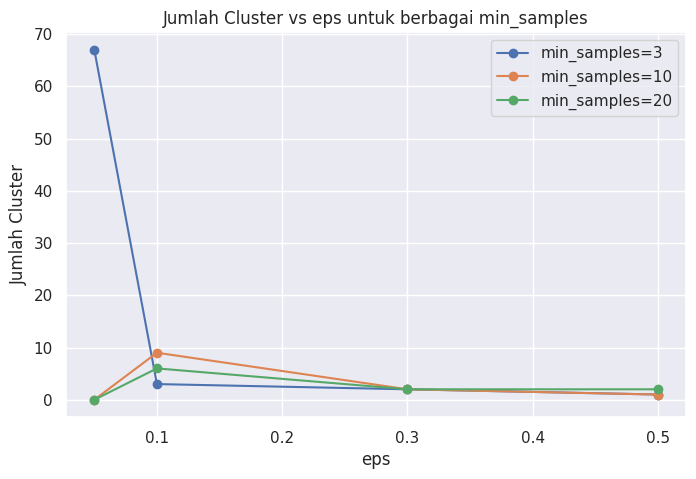

In [70]:
# Visualisasi hasil eksperimen
plt.figure(figsize=(8,5))
for ms in min_samples_values:
    subset = df_exp[df_exp['min_samples']==ms]
    plt.plot(subset['eps'], subset['n_clusters'], marker='o', label=f'min_samples={ms}')
plt.title("Jumlah Cluster vs eps untuk berbagai min_samples")
plt.xlabel("eps")
plt.ylabel("Jumlah Cluster")
plt.legend()
plt.show()